# *Dataset Preprocessing*

Necessary imports and initialize label encoder

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Preprocessing training data

In [3]:
df_train = pd.read_csv('PayLoadBitsTraining.csv')
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values

y_train = le.fit_transform(y_train)

y_train = tf.keras.utils.to_categorical(y_train)



# Convert binary strings to numerical values
X_train = np.array([list(map(int, x)) for x in X_train])

# Reshape input data to fit model input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

Preprocessing testing data

In [4]:
df_test = pd.read_csv('PayLoadBitsTesting.csv')
X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

y_test = le.fit_transform(y_test)
y_test = tf.keras.utils.to_categorical(y_test)

X_test = np.array([list(map(int, x)) for x in X_test])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# *Recall Rate*

Recall rate pre-processing

In [5]:
TPFN = np.sum(y_test, axis=0)
label = df_test['protocol'].unique()

start_index= []
y_values = y_test.argmax(axis=1)

for i in range(1,len(y_test)):
  if(y_values[i-1]!=y_values[i]):
    start_index.append(i)

start_index.append(0)
start_index.append(len(y_test))
start_index.sort()

*Plot Graph*

In [6]:
import matplotlib.pyplot as plt

def plot_dict(tmp_dict,model_name):
  labels = list(tmp_dict.keys())
  values = list(tmp_dict.values())
  plt.bar(labels, values)

  plt.xticks(rotation = 45)

  plt.title(model_name)
  plt.xlabel('Network Protocols')
  plt.ylabel('Recall Rate')

  plt.show()


*Print Dict*

In [7]:
def print_dict(tmp_dict):
  print("")
  for key,value in tmp_dict.items():
    print(f'{key}  {value}')


*Compute Recall Rate*

In [8]:
def compute_recall(y_pred,model_name):
  Tp = []
  for i in range(len(start_index)-1):
    a = (y_pred[start_index[i]:start_index[i+1]].argmax(axis=1) == y_test[start_index[i]:start_index[i+1]].argmax(axis=1)).sum()

    Tp.append(a)

  recall = Tp/TPFN

  recallRateDict = {}
  for i in range(len(label)):
    recallRateDict[label[i]] = recall[i]

  print_dict(recallRateDict)
  plot_dict(recallRateDict,model_name)

# *CNN*

In [16]:

CNN = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(32, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 30, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 960)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                30752     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 31338 (122.41 KB)
Trainable params: 31338 (122.41 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [10]:
# train the model
CNN.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1976/1976 [==============================] - 9s 4ms/step - loss: 0.0359 - accuracy: 0.9927
Epoch 2/10
1976/1976 [==============================] - 6s 3ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 3/10
1976/1976 [==============================] - 8s 4ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 4/10
1976/1976 [==============================] - 6s 3ms/step - loss: 8.8391e-04 - accuracy: 0.9998
Epoch 5/10
1976/1976 [==============================] - 7s 4ms/step - loss: 6.4173e-04 - accuracy: 0.9998
Epoch 6/10
1976/1976 [==============================] - 6s 3ms/step - loss: 5.0566e-04 - accuracy: 0.9999
Epoch 7/10
1976/1976 [==============================] - 8s 4ms/step - loss: 5.4814e-04 - accuracy: 0.9998
Epoch 8/10
1976/1976 [==============================] - 7s 4ms/step - loss: 4.6971e-04 - accuracy: 0.9998
Epoch 9/10
1976/1976 [==============================] - 7s 4ms/step - loss: 2.9437e-04 - accuracy: 0.9999
Epoch 10/10
1976/1976 [==============================] - 7

1993/1993 [==============================] - 4s 2ms/step - loss: 0.0020 - accuracy: 0.9997
[0.0020422213710844517, 0.9997177124023438]
1993/1993 [==============================] - 4s 2ms/step

Bacnet  1.0
Bjnp  1.0
Bootp  1.0
DNS  1.0
Kerberos  0.9955423476968797
NBNS  0.993705743509048
NBSS  0.9945054945054945
NTP  1.0
QUIC  0.9456521739130435
SSH  1.0


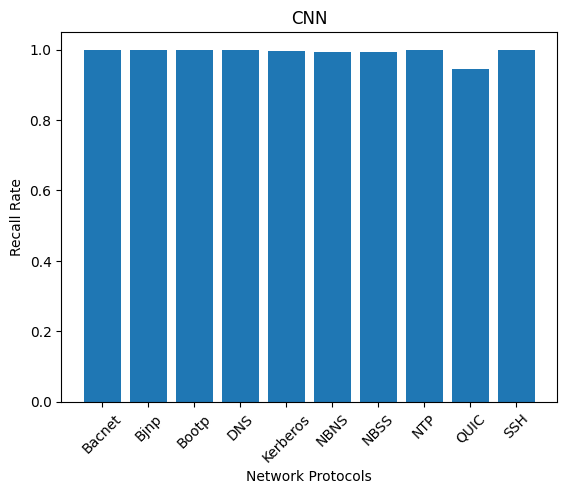

In [11]:
# evaluate the model
print(CNN.evaluate(X_test, y_test))
compute_recall(CNN.predict(X_test),'CNN')

# *RNN*

In [17]:
# create the RNN model
RNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2, output_dim=32, input_length=32),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
RNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
RNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 32)            64        
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 2474 (9.66 KB)
Trainable params: 2474 (9.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# train the model
RNN.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1976/1976 [==============================] - 20s 9ms/step - loss: 0.0843 - accuracy: 0.9837
Epoch 2/10
1976/1976 [==============================] - 20s 10ms/step - loss: 0.0137 - accuracy: 0.9969
Epoch 3/10
1976/1976 [==============================] - 21s 11ms/step - loss: 0.0083 - accuracy: 0.9980
Epoch 4/10
1976/1976 [==============================] - 20s 10ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 5/10
1976/1976 [==============================] - 20s 10ms/step - loss: 0.0046 - accuracy: 0.9989
Epoch 6/10
1976/1976 [==============================] - 19s 9ms/step - loss: 0.0035 - accuracy: 0.9992
Epoch 7/10
1976/1976 [==============================] - 19s 10ms/step - loss: 0.0047 - accuracy: 0.9989
Epoch 8/10
1976/1976 [==============================] - 20s 10ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 9/10
1976/1976 [==============================] - 18s 9ms/step - loss: 0.0045 - accuracy: 0.9989
Epoch 10/10
1976/1976 [==============================] - 20s 10ms/s

1993/1993 [==============================] - 11s 5ms/step - loss: 0.0022 - accuracy: 0.9995
[0.0021905384492129087, 0.9995138049125671]
1993/1993 [==============================] - 8s 4ms/step

Bacnet  1.0
Bjnp  1.0
Bootp  1.0
DNS  0.999932891535945
Kerberos  0.9925705794947994
NBNS  0.991345397324941
NBSS  0.9835164835164835
NTP  1.0
QUIC  0.9456521739130435
SSH  1.0


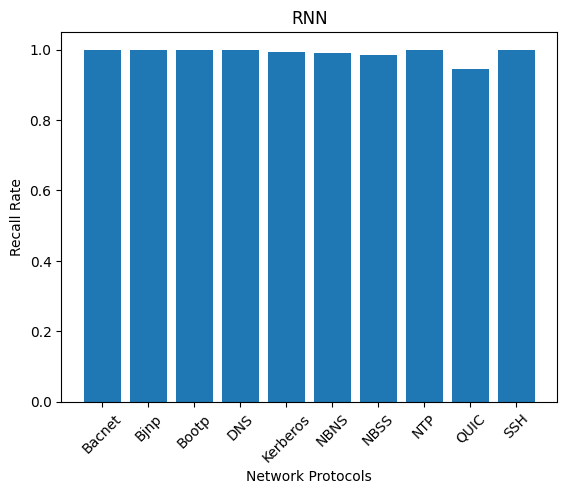

In [22]:
# evaluate the model
print(RNN.evaluate(X_test, y_test))
compute_recall(RNN.predict(X_test),'RNN')

# *LSTM*

In [18]:
# create the LSTM model
LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2, output_dim=32, input_length=32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LSTM.summary();

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 32)            64        
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 8714 (34.04 KB)
Trainable params: 8714 (34.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the model
LSTM.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1976/1976 [==============================] - 35s 17ms/step - loss: 0.1425 - accuracy: 0.9730
Epoch 2/10
1976/1976 [==============================] - 34s 17ms/step - loss: 0.0247 - accuracy: 0.9948
Epoch 3/10
1976/1976 [==============================] - 34s 17ms/step - loss: 0.0117 - accuracy: 0.9970
Epoch 4/10
1976/1976 [==============================] - 37s 19ms/step - loss: 0.0087 - accuracy: 0.9978
Epoch 5/10
1976/1976 [==============================] - 35s 18ms/step - loss: 0.0055 - accuracy: 0.9986
Epoch 6/10
1976/1976 [==============================] - 35s 18ms/step - loss: 0.0055 - accuracy: 0.9986
Epoch 7/10
1976/1976 [==============================] - 35s 18ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 8/10
1976/1976 [==============================] - 35s 18ms/step - loss: 0.0047 - accuracy: 0.9989
Epoch 9/10
1976/1976 [==============================] - 35s 18ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 10/10
1976/1976 [==============================] - 34s 17m

1993/1993 [==============================] - 12s 6ms/step - loss: 0.0057 - accuracy: 0.9988
[0.0057276031002402306, 0.9987766742706299]
1993/1993 [==============================] - 12s 6ms/step

Bacnet  1.0
Bjnp  1.0
Bootp  1.0
DNS  0.9999832228839862
Kerberos  0.9985141158989599
NBNS  0.9866247049567269
NBSS  0.9120879120879121
NTP  0.972568578553616
QUIC  0.8260869565217391
SSH  1.0


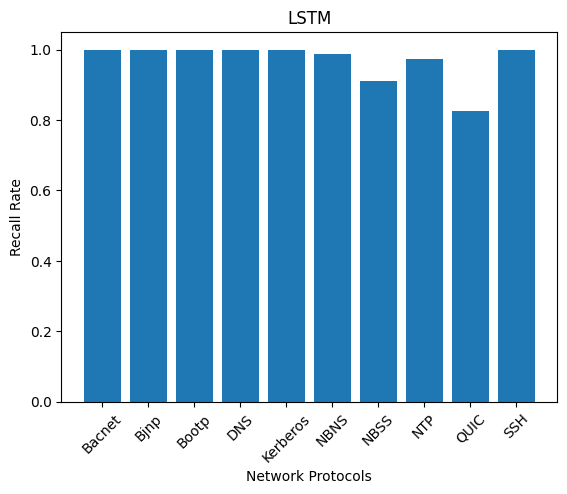

In [ ]:
# evaluate the model
print(LSTM.evaluate(X_test, y_test))
compute_recall(LSTM.predict(X_test),'LSTM')

# *GRU*

In [19]:
# create the GRU model
GRU = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2, output_dim=32, input_length=32),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
GRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
GRU.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 32)            64        
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 6730 (26.29 KB)
Trainable params: 6730 (26.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the model
GRU.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1976/1976 [==============================] - 41s 19ms/step - loss: 0.1231 - accuracy: 0.9755
Epoch 2/10
1976/1976 [==============================] - 40s 20ms/step - loss: 0.0237 - accuracy: 0.9944
Epoch 3/10
1976/1976 [==============================] - 38s 19ms/step - loss: 0.0145 - accuracy: 0.9965
Epoch 4/10
1976/1976 [==============================] - 43s 22ms/step - loss: 0.0115 - accuracy: 0.9969
Epoch 5/10
1976/1976 [==============================] - 38s 19ms/step - loss: 0.0074 - accuracy: 0.9982
Epoch 6/10
1976/1976 [==============================] - 39s 20ms/step - loss: 0.0050 - accuracy: 0.9988
Epoch 7/10
1976/1976 [==============================] - 39s 20ms/step - loss: 0.0039 - accuracy: 0.9991
Epoch 8/10
1976/1976 [==============================] - 37s 19ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 9/10
1976/1976 [==============================] - 37s 19ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 10/10
1976/1976 [==============================] - 36s 18m

1993/1993 [==============================] - 10s 5ms/step - loss: 0.0037 - accuracy: 0.9994
[0.003664938034489751, 0.999372661113739]
1993/1993 [==============================] - 9s 4ms/step

Bacnet  1.0
Bjnp  1.0
Bootp  1.0
DNS  0.9999832228839862
Kerberos  0.9955423476968797
NBNS  0.988985051140834
NBSS  0.9862637362637363
NTP  1.0
QUIC  0.8152173913043478
SSH  1.0


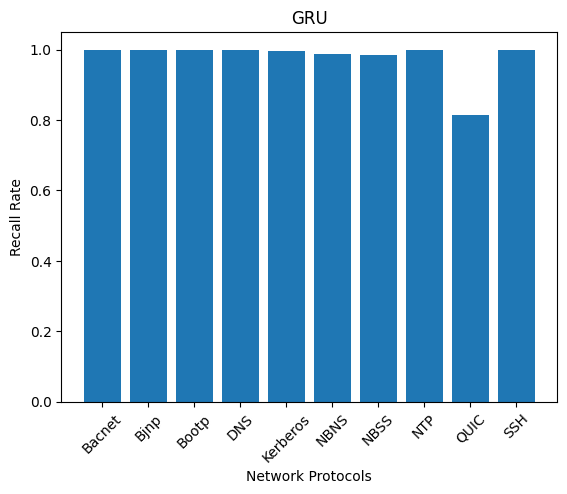

In [ ]:
# evaluate the model
print(GRU.evaluate(X_test, y_test))
compute_recall(GRU.predict(X_test),'GRU')

# *ANN*

In [20]:
ANN = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
ANN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ANN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 4522 (17.66 KB)
Trainable params: 4522 (17.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the model
ANN.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1976/1976 [==============================] - 4s 2ms/step - loss: 0.0621 - accuracy: 0.9873
Epoch 2/10
1976/1976 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 3/10
1976/1976 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 4/10
1976/1976 [==============================] - 4s 2ms/step - loss: 8.8441e-04 - accuracy: 0.9998
Epoch 5/10
1976/1976 [==============================] - 3s 2ms/step - loss: 6.8741e-04 - accuracy: 0.9998
Epoch 6/10
1976/1976 [==============================] - 3s 2ms/step - loss: 3.9757e-04 - accuracy: 0.9999
Epoch 7/10
1976/1976 [==============================] - 3s 2ms/step - loss: 3.1234e-04 - accuracy: 0.9999
Epoch 8/10
1976/1976 [==============================] - 4s 2ms/step - loss: 3.9292e-04 - accuracy: 0.9999
Epoch 9/10
1976/1976 [==============================] - 3s 2ms/step - loss: 2.0044e-04 - accuracy: 0.9999
Epoch 10/10
1976/1976 [==============================] - 3

[0.002867677714675665, 0.9997177124023438]
1993/1993 [==============================] - 3s 1ms/step

Bacnet  1.0
Bjnp  1.0
Bootp  1.0
DNS  1.0
Kerberos  0.9895988112927192
NBNS  0.99213217938631
NBSS  0.9972527472527473
NTP  1.0
QUIC  1.0
SSH  1.0


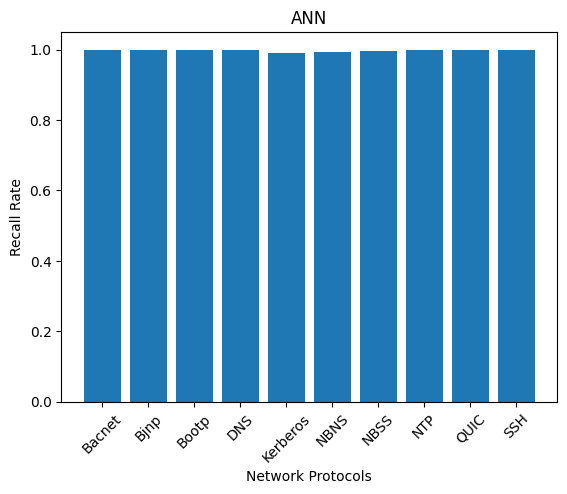

In [ ]:
# evaluate the model
print(ANN.evaluate(X_test, y_test, verbose=0))
compute_recall(ANN.predict(X_test),'ANN')